# Vicsek Model
###### Rebecca Crossley(1708811), Yulin Zhang, Shancheng Wang & Katy Fellingham

This research concerns models of flocking in birds, as initially proposed by Tamas Vicsek in ____. 

In this, we model each bird as a weightless point particle moving with an initial constant velocity of $v_0$ along a polar direction $\hat{n}=(cos \theta,sin \theta)$. Then, in order to create a swarming behaviour, the birds check in at each discrete time step with all of its neighbours within a radius $R$ and reorientate themselves along the mean direction of all birds within the region. Since birds are imperfect creatures, we take account for this by including a random normally distributed noise term, $\eta_i$, with mean 0 and variance $\sigma$.

In 2D, we can define the equations of motion of bird $i$ at time $t+1$ by: $$\vec{r_i}(t+1)=\vec{r_i}(t)+\hat{n}_i v_o$$ $$\theta_i(t+1)=\sum_{j=1}^{z_i}{\hat{n}_j}+\eta_i$$ where $z_i$ is the total number of neighbours within radius $R$.

Below are the functions required to produce visual demonstrations of this swarming behaviour. 

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from scipy import stats
from scipy import spatial

# calculate the distance between p1 and p2 under boundary conditions
# dr = (dx,dy) ?????????????????????????????query how knowsn?
def cal_bc_distance(dr):
    t1 = 0
    t2 = 0
    dx = dr[0]
    dy = dr[1]
    if dx > L/2:
        t1 = -L
    elif dx < -L/2:
        t1 = L
    if dy > L/2:
        t2 = -L
    elif dy < -L/2:
        t2 = L    
    return np.sqrt((dx + t1)**2+(dy + t2)**2)

# return the distance matrix(N*N) calculated from birds positions
def cal_pdist(birds_pos):
    N=len(birds_pos)
    Dist = np.zeros((N,N))
    for i in range(1,N):
        for j in range(i):
            Dist[i,j] = Dist[j,i] = cal_bc_distance(birds_pos[j,:]-birds_pos[i,:])
    return Dist

# initialize the state of birds
def initialize(L,N):
    state = np.zeros((N,3))
    state[:,:2] = np.random.uniform(0,L,(N,2))# positions x,y
    state[:,2] = np.random.uniform(0,2*np.pi,N) # angles theta
    return state

# update the state of birds in each time step
def update(state, L, v0, R, eta): 
    N=len(state)
    # Initialise heading with noise
    heading = eta
    
    # Use adjacency matrix to determine neighbours
    A = cal_pdist(state[:,:2])
    for i in range(N):
        adj = np.where(A[i,:] < R)[0] # indices of adjacent particles
        theta = state[adj,2] # angles of all adjacent particles
        
        # Sum sin and cos of angles
        sum_sin = np.sum(np.sin(theta))
        sum_cos = np.sum(np.cos(theta))
        
        # Compute heading for this particle
        heading[i] += np.arctan2(sum_sin, sum_cos)
        
    # Update state with new headings
    state[:,2] = heading 
    # Update positions(mod L)
    state[:,0] = (state[:,0] + v0*np.cos(state[:,2]))%L
    state[:,1] = (state[:,1] + v0*np.sin(state[:,2]))%L
    return state

def order_para(state):
    N = len(state)
    x = np.sum(np.cos(state[:,2]))
    y = np.sum(np.sin(state[:,2]))
    order_para = np.sqrt(x**2+y**2)/N
    return order_para


For 200 birds in a 15 x 15 container, we get the following:

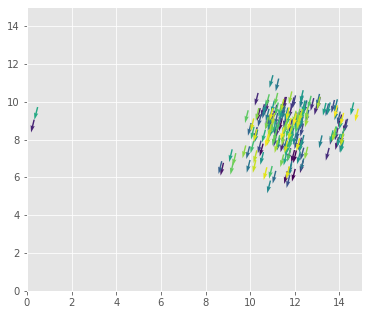

In [ ]:
N = 200  # number of individual birds
L = 15   # size of the container(L*L)
v0 = 0.5  # the constant velocity of the birds per time step
R = 1 # radius within which to search for neighbours
sigma = 0.01  # variance of noise
T = 10000  # total time steps
Noise_generator = stats.norm(0,sigma)
opara = np.zeros(T) # the Vicsek order parameter
plt.figure(figsize=(6,24))

state = initialize(L,N)
for t in range(T):
    eta = Noise_generator.rvs(N) # noise term
    state = update(state, L, v0, R, eta)
    opara[t] = order_para(state)
    #plot tests at 999,3999,6999,9999
    i = 1
    if (t-999)%3000 == 0:
        plt.subplot(4,1,i)
        i += 1
        plt.quiver(state[:,0],state[:,1],np.cos(state[:,2]),np.sin(state[:,2]),np.arange(N)) 
        plt.xlim(0,15)
        plt.ylim(0,15)
        plt.show()

Now for $T=10,000$ steps, we plot the Vicsek order paramater (as calculated in the above cell) against the time. 

In [ ]:
plt.figure(figsize=(3,5))
plt.plot(np.arange(T),opara,'b')    
plt.show()

We use these images as produced above at a variety of time steps to create an animation of the birds' motion for 1000 steps. 

In [ ]:
for t in range(T):
    eta = Noise_generator.rvs(N) # noise term
    state = update(state, L, v0, R, eta)
    #opara[t] = order_para(state,N)
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.quiver(state[:,0],state[:,1],np.cos(state[:,2]),np.sin(state[:,2]),np.arange(N)) 
    ax.set_xlim(0,15)
    ax.set_ylim(0,15)
    fig.savefig('pics/{}.png'.format(t))
    plt.close(fig)

In [ ]:
# make a video
import cv2
import numpy as np

T = 1000
img_array = []
for i in range(T):
    #img = cv2.imread(filename)
    img = cv2.imread('pics/{}.png'.format(i))
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

 
 
out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'FMP4'), 12, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [7]:
%timeit main(L,N,10)

2.06 s ± 81.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
N = 200  # number of individual birds
L = 15   # size of the container(L*L)
v0 = 0.5  # the constant velocity of the birds per time step
R = 1 # radius within which to search for neighbours
sigma = 0.01  # variance of noise
T = 10000  # total time steps
Noise_generator = stats.norm(0,sigma)
opara = np.zeros(T) # the Vicsek order parame

import os

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
        


def main(L,N,T):
    state = initialize(L,N)
    createFolder('./pics/')
    for t in range(T):
        eta = Noise_generator.rvs(N) # noise term
        state = update(state, L, N, v0, R, eta)
        #opara[t] = order_para(state,N)
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.quiver(state[:,0],state[:,1],np.cos(state[:,2]),np.sin(state[:,2]),np.arange(N)) 
        ax.set_xlim(0,15)
        ax.set_ylim(0,15)
        fig.savefig('pics/{}.png'.format(t))
        plt.close(fig)

In [ ]:
import pandas as pd
df = pd.DataFrame(data=data[0:,0:],
      ...        index=[i for i in range(data.shape[0])],
      ...        columns=['f'+str(i) for i in range(data.shape[1])])

In [17]:
N = 200  # number of individual birds
L = 15   # size of the container(L*L)
v0 = 0.5  # the constant velocity of the birds per time step
R = 1 # radius within which to search for neighbours
T = 500  # total time steps


def cal_n_sigma(L,N,T,sigma):
    Noise_generator = stats.norm(0,sigma)
    opara = np.zeros(T) # the Vicsek order parame
    state = initialize(L,N)
    for t in range(T):
        eta = Noise_generator.rvs(N) # noise term
        state = update(state, L, N, v0, R, eta)
        opara[t] = order_para(state,N)
    return opara

d_sigma = 20
res = np.zeros((T,d_sigma))
i = 0
for sigma in np.linspace(0,0.6,d_sigma):
    opara = cal_n_sigma(L,N,T,sigma)
    res[:,i] = opara
    i += 1

import pandas as pd
df = pd.DataFrame(data=res,index=[i+1 for i in range(res.shape[0])],columns=[str(sigma) for sigma in np.linspace(0,0.6,d_sigma)])
df.to_csv('n_sigma.csv')

ValueError: Shape of passed values is (500, 20), indices imply (500, 10)

In [14]:
print(res)

[0.         0.         0.         0.         0.         0.12753764
 0.14379725 0.18204908 0.23459698 0.27819515 0.13606892 0.20660099
 0.2031974  0.1832362  0.17668166 0.28004159 0.38769008 0.4813759
 0.50783658 0.53436205 0.27678864 0.33316209 0.37061091 0.3918586
 0.38942318 0.19923368 0.28865708 0.33812192 0.46775408 0.56982106
 0.13191373 0.1621625  0.22933747 0.27658284 0.38611522 0.05205045
 0.06843761 0.06204247 0.12205855 0.1421114  0.12032186 0.15386141
 0.22199837 0.24719546 0.28584717 0.17450111 0.19569817 0.2633973
 0.2496662  0.28022688 0.21063906 0.23321774 0.29334721 0.31022462
 0.35321369]


In [18]:
import pandas as pd
df = pd.DataFrame(data=res,index=[i+1 for i in range(res.shape[0])],columns=[str(sigma) for sigma in np.linspace(0,0.6,d_sigma)])
df.to_csv('n_sigma.csv')